In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [4]:
df3 = pd.read_csv('/content/hiring - hiring.csv')
df3.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [5]:
df3.isnull().sum()

,0
experience,2
test_score(out of 10),1
interview_score(out of 10),0
salary($),0


In [6]:
df3.dropna(inplace=True)

In [7]:
df3.isnull().sum()

,0
experience,0
test_score(out of 10),0
interview_score(out of 10),0
salary($),0


In [8]:
features = df3.drop(['salary($)'], axis=1)
target_salary = df3['salary($)']

In [9]:
features.head()

,experience,test_score(out of 10),interview_score(out of 10)
2,five,6.0,7
3,two,10.0,10
4,seven,9.0,6
5,three,7.0,10
7,eleven,7.0,8


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2 to 7
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  5 non-null      object 
 1   test_score(out of 10)       5 non-null      float64
 2   interview_score(out of 10)  5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


In [11]:
features.experience = features.experience.replace({'five': 5, 'two': 2, 'seven': 7, 'three': 3, 'ten': 10, 'eleven': 11}).astype(int)

/tmp/ipython-input-4201987919.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features.experience = features.experience.replace({'five': 5, 'two': 2, 'seven': 7, 'three': 3, 'ten': 10, 'eleven': 11}).astype(int)


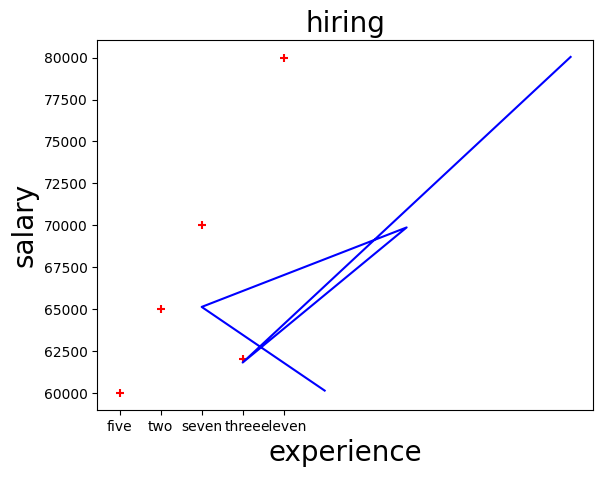

In [12]:
lr3 = linear_model.LinearRegression()
lr3.fit(features, target_salary)

%matplotlib inline
plt.xlabel('experience', fontsize = 20)
plt.ylabel('salary', fontsize = 20)
plt.title('hiring', fontsize = 20)
plt.scatter(df3.experience, df3['salary($)'], color='red', marker='+')
plt.plot(features.experience, lr3.predict(features), color='blue')

In [13]:
lr3.predict([[0, 8, 5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47265.71216065])